# Aprendizado de máquinas

- Podemos usar Machine Learning para conseguir chegar no mesmo resultado da equação abaixo:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
dados = {
    'X': [1.3,2.5,3.8,5.1,6],
    'Y': [168,312,468,624,732]
}

dados = pd.DataFrame(dados)

**Plotando esses pontos em um gráfico**

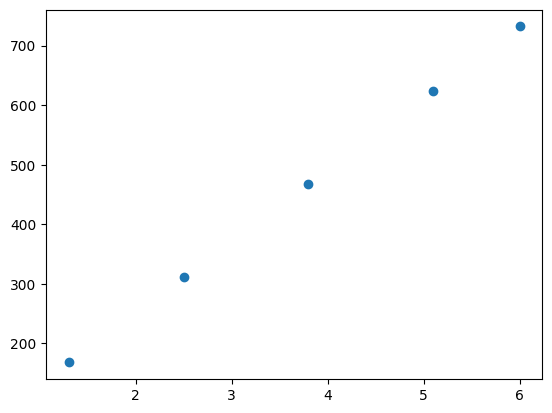

In [3]:
fig,ax = plt.subplots()

ax.scatter(dados.X,dados.Y)

plt.show()

**Existe uma reta que passa por esses pontos**

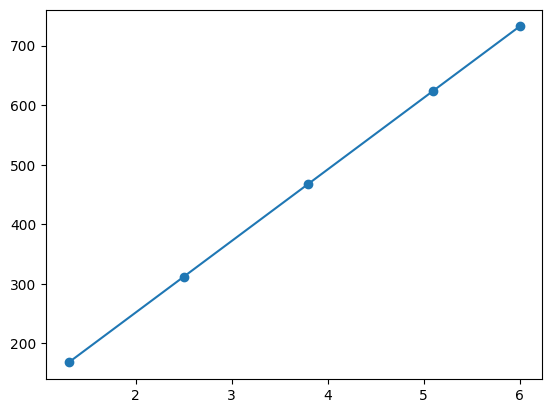

In [4]:
fig,ax = plt.subplots()

ax.scatter(dados.X,dados.Y)
x = [dados.X[0],dados.X[4]]
y = [dados.Y[0],dados.Y[4]]
ax.plot(x,y)

plt.show()

**E essa reta é dada por:**<br>
**f(x) = 12 + 120x**

**Então, para estimar o valor de qualquer novo x basta substituir nessa equação**<br><br>
**Se x = 4,5, qual será o valor de f(x)?**<br><br>
**f(x) = 12 + 120.(4,5) = 552**

## E se quisermos usar ML para traçar essa reta?
- Obs: não vamos focar agora no modelo de Machine Learning, somente vamos usar os coeficientes (linear e angular) para traçar a reta
- https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html?highlight=linear%20regression#sklearn.linear_model.LinearRegression

In [5]:
from sklearn.linear_model import LinearRegression
modelo = LinearRegression()
modelo.fit(dados.X.values.reshape(-1, 1),dados.Y)

LinearRegression()

**O coeficiente linear desse modelo é dado por:**

In [6]:
# Coeficiente linear
modelo.intercept_

12.0

**E o coeficiente angular:**

In [7]:
# Coeficiente angular
modelo.coef_

array([120.])

**Podemos primeiramente plotar os pontos em um gráfico**

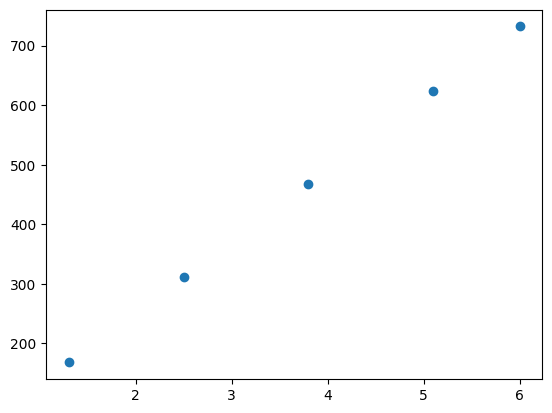

In [8]:
fig,ax = plt.subplots()

ax.scatter(dados.X,dados.Y)

plt.show()

**E usar esses dois coeficientes para traçar a reta que melhor se adequa a esses pontos**
- para isso, podemos considerar um range de 1 a 6 (inclusive) para o x e aplicar a função dada por **`y = intercept_ + x.coef_`** para traçar os valores de y

In [9]:
x = np.arange(1,8)
y = modelo.intercept_ + x*modelo.coef_[0]

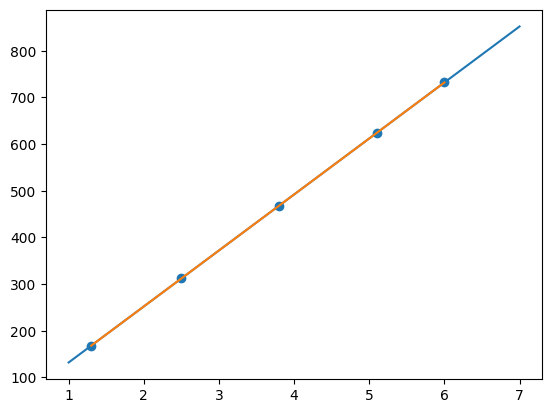

In [10]:
fig,ax = plt.subplots()

ax.scatter(dados.X,dados.Y)
ax.plot(x,y)
x2 = [dados.X[0],dados.X[4]]
y2 = [dados.Y[0],dados.Y[4]]
ax.plot(x2,y2)

plt.show()

**Observe que os valores do coeficiente angular e linear são exatamente iguais da reta sem usar Machine Learning, então substituindo na reta o resultado será o mesmo** <br><br>

**Porém, em ML, podemos apenas usar o predict**

In [11]:
# Prevendo algum valor usando o modelo que acabamos de criar
modelo.predict(pd.DataFrame([4.5]))

array([552.])

**<font color="blue">Nesse caso o valor foi exatamente o mesmo!</font>**

## Agora vamos supor que os dados não estão tão bem distribuídos assim

In [12]:
dados2 = {
    'X': [1.3,2.5,3.8,5.1,6],
    'Y': [168,275,501,705,732]
}

dados2 = pd.DataFrame(dados2)

**Novamente plotando esses dados e a reta que passa pelo primeiro e pelo último ponto**

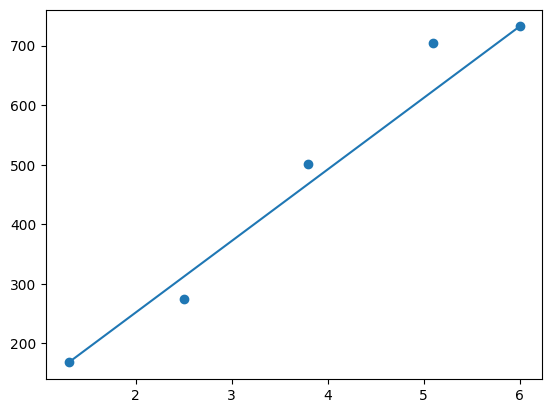

In [13]:
fig,ax = plt.subplots()

ax.scatter(dados2.X,dados2.Y)
x = [dados.X[0],dados.X[4]]
y = [dados.Y[0],dados.Y[4]]
ax.plot(x,y)

plt.show()

**<font color="red">Será que essa realmente é a melhor reta que passa por esses pontos?</font>**

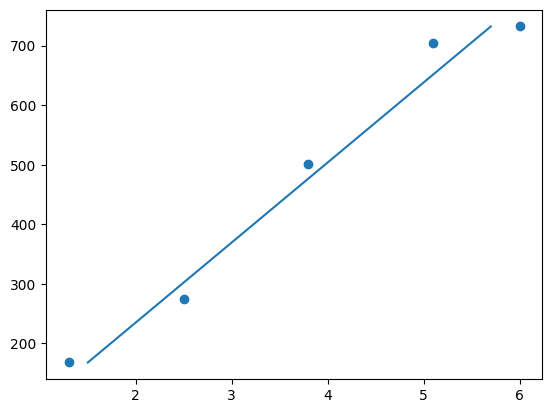

In [14]:
fig,ax = plt.subplots()

ax.scatter(dados2.X,dados2.Y)
x = [dados.X[0]+0.2,dados.X[4]-0.3]
y = [dados.Y[0],dados.Y[4]]
ax.plot(x,y)

plt.show()

**<font color="red">Será que essa nova reta é melhor?</font>**

### E se usarmos ML para traçar a reta?

In [15]:
from sklearn.linear_model import LinearRegression
modelo = LinearRegression()
modelo.fit(dados2.X.values.reshape(-1, 1),dados2.Y)

LinearRegression()

**Sendo o coeficiente linear e angular:**

In [16]:
# Coeficiente linear
print(modelo.intercept_)
# Coeficiente angular
print(modelo.coef_[0])

-13.493634099086592
130.93412676446167


**Podemos traçar em vermelho a reta que foi dada pelo modelo**

In [17]:
x_ML = np.arange(1,7)
y_ML = modelo.intercept_ + x_ML*modelo.coef_[0]

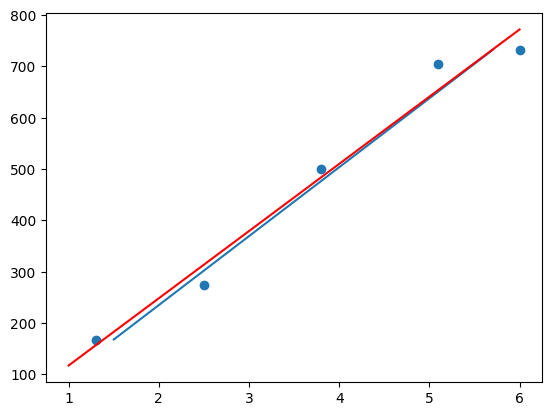

In [18]:
fig,ax = plt.subplots()

ax.scatter(dados2.X,dados2.Y)
x = [dados.X[0]+0.2,dados.X[4]-0.3]
y = [dados.Y[0],dados.Y[4]]
ax.plot(x,y)
ax.plot(x_ML,y_ML,c="red")

plt.show()

**<font color="blue">Nesse caso o modelo de ML já nos entrega um resultado melhor do que fazendo sem o modelo e sem o trabalho manual de ficar tentando traçar a melhor reta que passa por esses pontos!</font>**

## E se tivermos mais que 2 colunas nos dados?

In [19]:
dados3 = {
    'X': [1.3,2.5,3.8,5.1,6],
    'Z': [0.2,0.1,0.3,0.2,0.1],
    'Y': [162,309,459,618,729]
}

dados3 = pd.DataFrame(dados3)

In [20]:
dados3.head()

,X,Z,Y
0,1.3,0.2,162
1,2.5,0.1,309
2,3.8,0.3,459
3,5.1,0.2,618
4,6.0,0.1,729


**<font color="red">Vamos traçar um gráfico em 3D? Até poderia tentar, mas além de não ajudar muito, conforme aumentarmos as colunas isso vai se tornando cada vez mais inviável</font>**

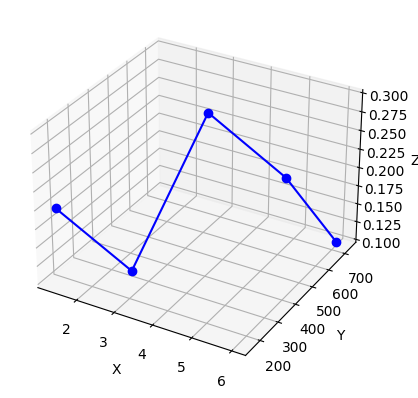

In [21]:
fig = plt.figure()

ax = fig.add_subplot(111, projection='3d')

ax.plot(dados3.X, dados3.Y, dados3.Z, c = 'b', marker='o')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

plt.show()

### Podemos usar diretamente Machine Learning

In [22]:
from sklearn.linear_model import LinearRegression
modelo = LinearRegression()
modelo.fit(dados3.drop("Y",axis=1),dados3.Y)

LinearRegression()

**Analisando o coeficiente linear e angular**

In [23]:
# Coeficiente linear
print(modelo.intercept_)
# Coeficiente angular
print(modelo.coef_)

12.000000000000114
[120. -30.]


**E se quisermos fazer a predição usando esse modelo, basta fazer**

In [24]:
# Y do modelo
dados3['Y_predicao'] = modelo.predict(dados3.drop("Y",axis=1))

In [25]:
display(dados3)

,X,Z,Y,Y_predicao
0,1.3,0.2,162,162.0
1,2.5,0.1,309,309.0
2,3.8,0.3,459,459.0
3,5.1,0.2,618,618.0
4,6.0,0.1,729,729.0


**<font color="blue">Nesse caso, existe uma função capaz de gerar o valor de Y e o modelo retornou exatamente os parâmetros dessa função dada por: <br>
`y = 12 + 120.x - 30.z`
</font>**

## Agora supondo que não exista esse função

In [26]:
dados4 = {
    'X': [1.3,2.5,3.8,5.1,6],
    'Z': [0.2,0.1,0.3,0.2,0.1],
    'Y': [158,315,450,630,700]
}

dados4 = pd.DataFrame(dados4)

**Usando ML**

In [27]:
from sklearn.linear_model import LinearRegression
modelo = LinearRegression()
modelo.fit(dados4.drop("Y",axis=1),dados4.Y)

LinearRegression()

**Analisando o coeficiente linear e angular**

In [28]:
# Coeficiente linear
print(modelo.intercept_)
# Coeficiente angular
print(modelo.coef_)

14.948614201901592
[116.86425248  -7.8939915 ]


**E se quisermos fazer a predição usando esse modelo, basta fazer**

In [29]:
dados4['Y_predicao'] = modelo.predict(dados4.drop("Y",axis=1))

In [30]:
display(dados4)

,X,Z,Y,Y_predicao
0,1.3,0.2,158,165.293344
1,2.5,0.1,315,306.319846
2,3.8,0.3,450,456.664576
3,5.1,0.2,630,609.377504
4,6.0,0.1,700,715.344730


**<font color="blue">Nesse caso, o ML seria uma super ferramenta para conseguir nos ajudar a encontrar o padrão nesses dados de forma a fazer a predição de Y da melhor forma possível considerando as ferramentas que a gente conhece**<br>